In [3]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

w[0]: 0.393906  b: -0.031804


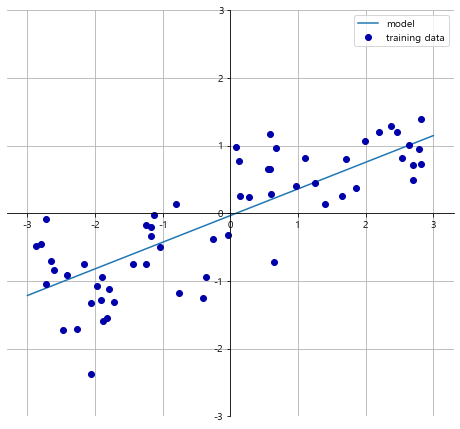

In [4]:
mglearn.plots.plot_linear_regression_wave() # mglearn 샘플 그래프 보기

In [5]:
from sklearn.model_selection import train_test_split # 일반화 성능 평가를 위해 기존 데이터를 훈련 세트와 테스트 세트로 나눔

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60) # 60개의 샘플 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # 훈련, 테스트 데이터셋 준비

lr = LinearRegression().fit(X_train, y_train) # 선형 회귀 모델에 훈련!

In [6]:
print("lr의 계수(weight 또는 cofficient) : {}".format(lr.coef_))
print("lr의 편향(offset 또는 intercept) : {}".format(lr.intercept_))

lr의 계수(weight 또는 cofficient) : [0.39390555]
lr의 편향(offset 또는 intercept) : -0.031804343026759746


In [10]:
# R-square value
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


- R-square value이 0.6이므로 과소적합인 상태

In [12]:
# Boston dataset
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


- train과 test의 R-square value 값이 차이가 나므로 과대적합

### 릿지(Ridge) 회귀

- 모든 특성이 예측(출력)에 주는 영향을 최소화
- 규제 : 과대적합이 되지 않도록 모델을 강제로 제한하는 것
- alpha 값이 커지면 특정 계수 값이 0에 가까워 짐
- L2 규제를 사용 => 불필요한 특성이 0에 한없이 가까워짐

In [15]:
from sklearn.linear_model import Ridge

# default - alpha : 1
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))
print()

# alpha : 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print()

# alpha : 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


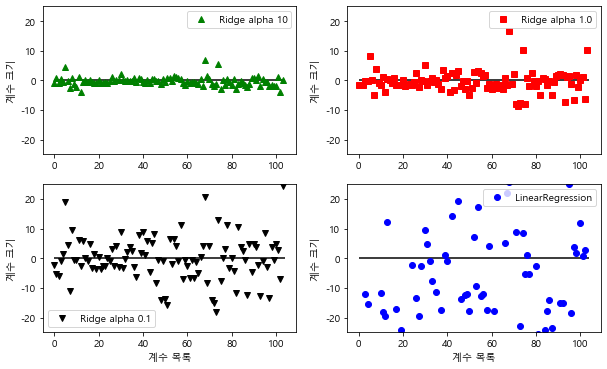

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(ridge10.coef_, '^',c='g', label="Ridge alpha 10")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

plt.subplot(222)
plt.plot(ridge.coef_, 's',c='r', label="Ridge alpha 1.0")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

plt.subplot(223)
plt.plot(ridge01.coef_, 'v',c='k', label="Ridge alpha 0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

plt.subplot(224)
plt.plot(lr.coef_, 'o',c='b', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

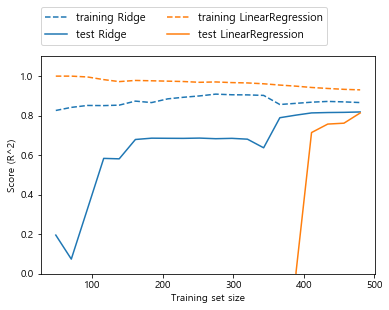

In [29]:
# 규제 효과를 알기 위해 alpha = 1 로 고정시키고 데이터 크기만 조정
mglearn.plots.plot_ridge_n_samples()

- 두 모델의 성능은 ( 테스트 데이터세트의 결과 ) 데이터가 많으면 많을 수록 좋아진다.
- 데이터를 충분히 주게 되면 규제 자체는 덜 중요해진다.

### 라쏘(Lasso) 회귀

- L1 규제 사용 => 불필요한 특성은 0이 된다.
- 특성 선택이 자동으로 된다.

In [88]:
from sklearn.linear_model import Lasso
# 전체 특성 갯수 : 105

# 과소 적합
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print()

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print()

# 과대 적합
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso0001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso0001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso0001.coef_ != 0)))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


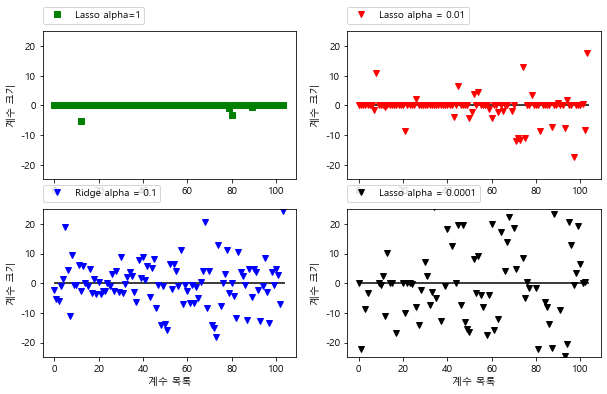

In [89]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.plot(lasso.coef_, 's',c='g', label="Lasso alpha=1")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

plt.subplot(222)
plt.plot(lasso001.coef_, 'v',c='r', label="Lasso alpha = 0.01")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

plt.subplot(223)
plt.plot(ridge01.coef_,'v', c = 'b', label="Ridge alpha = 0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

plt.subplot(224)
plt.plot(lasso0001.coef_, 'v',c='k', label="Lasso alpha = 0.0001")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

In [67]:
# interactive graph
import plotly.plotly as py 
import plotly.graph_objects as go
import cufflinks as cf 
cf.go_offline(connected=True)

In [120]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=lasso0001.coef_, x=np.linspace(0, len(lasso0001.coef_), len(lasso0001.coef_)),
                    mode='markers',
                    name='alpha : 0.001'))

fig.add_trace(go.Scatter(y=lasso001.coef_, x=np.linspace(0, len(lasso0001.coef_), len(lasso0001.coef_)),
                    mode='markers',
                    name='alpha : 0.01'))

fig.add_trace(go.Scatter(y=lasso.coef_, x=np.linspace(0, len(lasso0001.coef_), len(lasso0001.coef_)),
                    mode='markers',
                    name='alpha : 1'))